In [62]:
from pixell import enmap
import matplotlib.pyplot as plt
import numpy as np

In [65]:
m1 = enmap.read_map("outputs/test_david/masked_fraction.fits")
m2 = enmap.read_map("data/k_mask_boss.fits")

print(m1.shape)
print(m1.wcs)
print(m2.shape)
print(m2.wcs)

(402, 871)
car:{cdelt:[-0.008333,0.008333],crval:[179.3,0],crpix:[436.7,226]}
(3549, 12250)
car:{cdelt:[-0.008333,0.008333],crval:[182.5,0],crpix:[7798,748]}


In [66]:
# World coordinates of the corners of the HSC footprint
coords = m1.wcs.all_pix2world([[0,0],[nx,0],[0,ny],[nx,ny]],0)
# Pixel coordinates of the HSC corners in the HSC projection (this is trivial)
pix1 = m1.wcs.all_world2pix(coords, 0)
# Pixel coordinates of the HSC corners in the ACT projection (this is trivial)
pix2 = m2.wcs.all_world2pix(coords, 0)

# Edges in ACT projection
ix0_2 = int(np.amin(np.unique(pix2[:,0])))
ixf_2 = int(np.amax(np.unique(pix2[:,0])))
iy0_2 = int(np.amin(np.unique(pix2[:,1])))
iyf_2 = int(np.amax(np.unique(pix2[:,1])))


In [86]:
# Sanity checks
# Only two edges in x
ix_unique = np.unique(pix2[:, 0])
print(len(ix_unique)==2)

# Only two edges in y
iy_unique = np.unique(pix2[:, 1])
print(len(iy_unique)==2)

# Right separation between edges
nx = int(np.fabs(np.diff(ix_unique)))
ny = int(np.fabs(np.diff(iy_unique)))
print(m1.shape == (ny, nx))

# Integer pixel coordinates
print(np.all(np.fabs(iy_unique - np.rint(iy_unique))<1E-5))
print(np.all(np.fabs(ix_unique - np.rint(ix_unique))<1E-5))
print(np.fabs(iy_unique - np.rint(iy_unique).astype(int)))
print(np.fabs(ix_unique - np.rint(ix_unique).astype(int)))

True
True
True
True
True
[0. 0.]
[3.51064955e-10 3.51064955e-10]


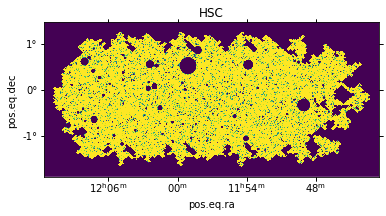

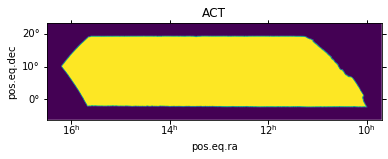

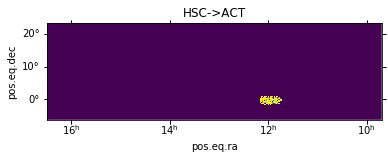

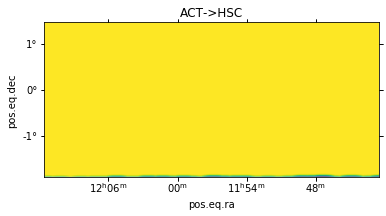

In [67]:
# HSC in the ACT footprint
m1_2 = np.zeros_like(m2); m1_2[iy0_2:iyf_2,ix0_2:ixf_2]=m1[:,:]
# ACT in the HSC footprint
m2_1 = np.zeros_like(m1); m2_1[:,:] = m2[iy0_2:iyf_2,ix0_2:ixf_2]

def pltmap(m,wcs,title):
    plt.figure()
    plt.subplot(projection=wcs)
    plt.imshow(m,origin='lower')
    plt.title(title)

pltmap(m1,m1.wcs,'HSC')
pltmap(m2,m2.wcs,'ACT')
pltmap(m1_2,m2.wcs,'HSC->ACT')
pltmap(m2_1,m1.wcs,'ACT->HSC')


In [56]:
ny, nx = m1.shape
print(coords.shape)
ix0_2 = int(np.amin(np.unique(pix2[:,0])))
ixf_2 = int(np.amax(np.unique(pix2[:,0])))
iy0_2 = int(np.amin(np.unique(pix2[:,1])))
iyf_2 = int(np.amax(np.unique(pix2[:,1])))
print(pix1)
print(pix2)
print(ix0_2)
print(ixf_2)
print(iy0_2)
print(iyf_2)
print(iyf_2-iy0_2, ixf_2-ix0_2, m1.shape)

(4, 2)
[[2.84217094e-13 0.00000000e+00]
 [8.71000000e+02 0.00000000e+00]
 [2.84217094e-13 4.02000000e+02]
 [8.71000000e+02 4.02000000e+02]]
[[7750.  522.]
 [8621.  522.]
 [7750.  924.]
 [8621.  924.]]
7749
8620
522
924
402 871 (402, 871)


In [58]:
m1_2 = np.zeros_like(m2); m1_2[iy0_2:iyf_2,ix0_2:ixf_2]=m1[:,:]
m2_1 = np.zeros_like(m1); m2_1[:,:] = m2[iy0_2:iyf_2,ix0_2:ixf_2]

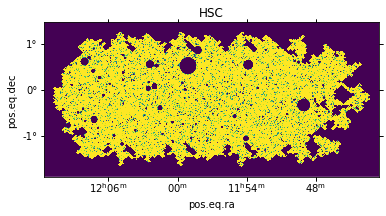

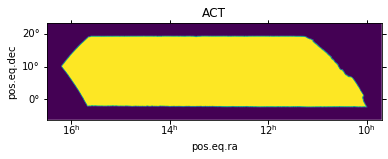

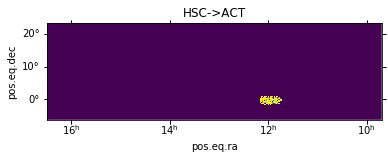

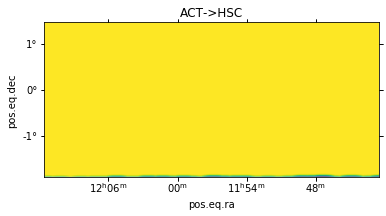

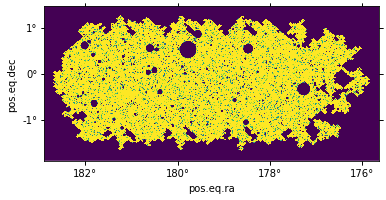

In [25]:
plt.subplot(projection=m1.wcs)
plt.imshow(m1,origin='lower')
ax=plt.gcaC].set_major_formatter('dd')


In [51]:
np.arange(10)[0:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])